<a href="https://colab.research.google.com/github/Vijayrrs485/Ruff-Stuff/blob/main/ML_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---


\***LOGISTIC REGRESSION (BINARY CLASSIFICATION)***

---



In [ ]:
import pandas as pd
df=pd.read_csv("/content/car_ownership.csv")
df.head()

,monthly_salary,owns_car
0,22000,0
1,25000,0
2,47000,1
3,52000,0
4,46000,1


In [ ]:
X=df[['monthly_salary']]
y=df[['owns_car']]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

model.score(X_test,y_test)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8888888888888888

In [ ]:
X_test

,monthly_salary
8,62000
13,29000
9,61000
21,26000
0,22000
11,28000
16,25000
17,58000
12,27000


In [ ]:
y_test

,owns_car
8,1
13,0
9,1
21,0
0,0
11,0
16,1
17,1
12,0


In [ ]:
y_pred=model.predict(X_test)
y_pred

array([1, 0, 1, 0, 0, 0, 0, 1, 0])

In [ ]:
8/9 #accuracy=right prediction/total predictions

0.8888888888888888

In [ ]:
model.predict_proba(X_test)

array([[0.04530932, 0.95469068],
       [0.80955349, 0.19044651],
       [0.05158003, 0.94841997],
       [0.86480041, 0.13519959],
       [0.91687254, 0.08312746],
       [0.82967465, 0.17032535],
       [0.87995016, 0.12004984],
       [0.07564619, 0.92435381],
       [0.84806892, 0.15193108]])

In [ ]:
from sklearn.metrics import classification_report
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.75      0.86         4

    accuracy                           0.89         9
   macro avg       0.92      0.88      0.88         9
weighted avg       0.91      0.89      0.89         9



In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[5, 0],
       [1, 3]])

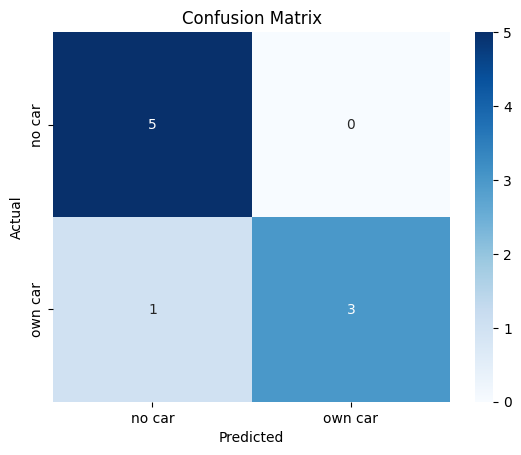

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

clases= ['no car', 'own car']
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=clases, yticklabels=clases)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



---


\***SUPPORT VECTOR MACHINE***

---



In [ ]:
import pandas as pd
df=pd.read_excel('/content/Raisin_Dataset.xlsx')
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [ ]:
X=df[["Area","MajorAxisLength","MinorAxisLength","Eccentricity","ConvexArea","Extent","Perimeter"]]
y=df["Class"]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

from sklearn.svm import SVC
model=SVC(kernel="rbf")  #accuracy increases but high computational
model.fit(X_train,y_train)

SVC()

In [ ]:
y_pred=model.predict(X_test)

from sklearn.metrics import classification_report
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

       Besni       0.88      0.79      0.83        86
     Kecimen       0.83      0.90      0.86        94

    accuracy                           0.85       180
   macro avg       0.85      0.85      0.85       180
weighted avg       0.85      0.85      0.85       180



In [ ]:
#Scale the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
X_train.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
10,80437,449.454581,232.325506,0.856043,84460,0.674236,1176.305
334,72483,334.417609,282.680889,0.534303,74945,0.706180,1052.159
244,85739,380.370379,288.256159,0.652452,87052,0.762152,1094.576
678,182788,621.206763,379.424446,0.791796,188848,0.733061,1679.075
306,62835,421.169338,191.169862,0.891051,64406,0.786145,1018.553


In [ ]:
X_train_scaled

array([[-0.19754789,  0.14897276, -0.44638417, ..., -0.1745895 ,
        -0.45516513,  0.02724995],
       [-0.40008943, -0.84195474,  0.54999871, ..., -0.40711493,
         0.12644893, -0.4268248 ],
       [-0.06253717, -0.44611797,  0.66031667, ..., -0.11124679,
         1.14554238, -0.27168095],
       ...,
       [ 1.9978914 ,  1.51465121,  1.87529558, ...,  1.89284623,
         0.98834335,  1.4824537 ],
       [-1.52730925, -1.60874052, -2.07050112, ..., -1.49774837,
        -1.40090526, -1.77704118],
       [-0.77377526, -1.05253197, -0.26748965, ..., -0.79789938,
         0.20231375, -0.93999151]])

In [ ]:
### Model Training Using SVM: Linear Kernel: No Scaling
from sklearn.svm import SVC
model = SVC(kernel="linear")
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

model.n_iter_


              precision    recall  f1-score   support

       Besni       0.82      0.90      0.86        86
     Kecimen       0.90      0.82      0.86        94

    accuracy                           0.86       180
   macro avg       0.86      0.86      0.86       180
weighted avg       0.86      0.86      0.86       180



array([292224717], dtype=int32)

In [ ]:
### Model Training Using SVM: Linear Kernel: With Scaling
from sklearn.svm import SVC
model = SVC(kernel="linear")
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

model.n_iter_


              precision    recall  f1-score   support

       Besni       0.84      0.87      0.86        86
     Kecimen       0.88      0.85      0.86        94

    accuracy                           0.86       180
   macro avg       0.86      0.86      0.86       180
weighted avg       0.86      0.86      0.86       180



array([1431], dtype=int32)



---

\***NAVIE BAYES CLASSIFIER***

---


In [44]:
import pandas as pd
df=pd.read_csv('spam.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [45]:
df['Category'].value_counts()

,count
Category,
ham,4825
spam,747


In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.Message,df.Category, test_size=0.2, random_state=5)
X_train[2]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [48]:
### Feature Engineering: Convert Text into Vector
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
X_train_count = v.fit_transform(X_train.values)
X_test_count = v.transform(X_test.values)

X_train_count.toarray()[:2]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [49]:
len(X_train_count.toarray()[1])

7705

In [50]:
### Train a Model Using Naive Bayes
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_count,y_train)

MultinomialNB()

In [51]:
### Model Evaluation: Precision, Recall and F1-Score
from sklearn.metrics import classification_report
y_pred = model.predict(X_test_count)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         ham       0.99      1.00      1.00       970
        spam       0.98      0.96      0.97       145

    accuracy                           0.99      1115
   macro avg       0.99      0.98      0.98      1115
weighted avg       0.99      0.99      0.99      1115



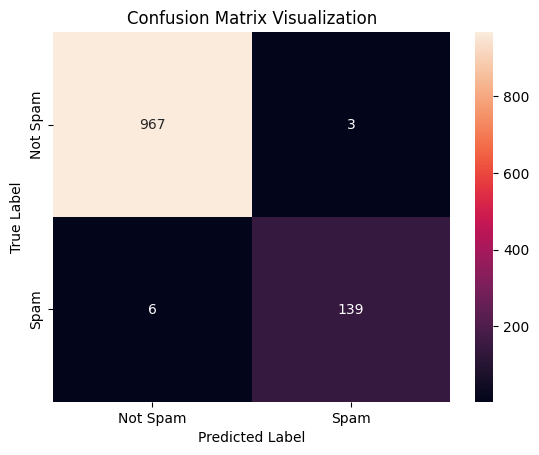

In [52]:
### Model Evaluation: Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
from matplotlib import pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Visualization')
plt.show()

In [55]:
### Prediction on Sample Emails
emails = ['Hey mohan, can we get together to watch footbal game tomorrow?',
            'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!']
emails_count = v.transform(emails)
model.predict(emails_count)

array(['ham', 'spam'], dtype='<U4')

In [58]:
### Now do same thing using Sklearn Pipeline with Few Lines of Code
from sklearn.pipeline import Pipeline
pipe = Pipeline([ ('vectorizer', CountVectorizer()), ('nb', MultinomialNB()) ])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         ham       0.99      1.00      1.00       970
        spam       0.98      0.96      0.97       145

    accuracy                           0.99      1115
   macro avg       0.99      0.98      0.98      1115
weighted avg       0.99      0.99      0.99      1115



In [57]:
pipe.predict(emails)

array(['ham', 'spam'], dtype='<U4')



---

\***DECISION TREE\***

---



In [95]:
import pandas as pd
df=pd.read_csv('salaries.csv')
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [96]:
df.shape

(16, 4)

In [97]:
df.degree.unique()

array(['bachelors', 'masters'], dtype=object)

In [99]:
###feature engineering (we can't do machine learning models in text formate)
df['degree_number']=df['degree'].map({'bachelors':1,'masters':2})
df.head()

,company,job,degree,salary_more_then_100k,degree_number
0,google,sales executive,bachelors,0,1
1,google,sales executive,masters,0,2
2,google,business manager,bachelors,1,1
3,google,business manager,masters,1,2
4,google,computer programmer,bachelors,0,1


In [104]:
df.drop('degree',axis='columns',inplace=True)
df.head()

,company,job,salary_more_then_100k,degree_number
0,google,sales executive,0,1
1,google,sales executive,0,2
2,google,business manager,1,1
3,google,business manager,1,2
4,google,computer programmer,0,1


In [105]:
df_encoded=pd.get_dummies(df, columns=['company','job'], drop_first=True)
df_encoded.head()

,salary_more_then_100k,degree_number,company_facebook,company_google,job_computer programmer,job_sales executive
0,0,1,False,True,False,True
1,0,2,False,True,False,True
2,1,1,False,True,False,False
3,1,2,False,True,False,False
4,0,1,False,True,True,False


In [106]:
X=df_encoded.drop('salary_more_then_100k',axis='columns')
y=df_encoded['salary_more_then_100k']

from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(X,y)

DecisionTreeClassifier()

In [107]:
from sklearn.metrics import classification_report
y_pred=model.predict(X)
report=classification_report(y, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        10

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



In [108]:
from sklearn.tree import export_text
print(export_text(model, feature_names=list(X.columns)))

|--- company_facebook <= 0.50
|   |--- job_sales executive <= 0.50
|   |   |--- degree_number <= 1.50
|   |   |   |--- company_google <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- company_google >  0.50
|   |   |   |   |--- job_computer programmer <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- job_computer programmer >  0.50
|   |   |   |   |   |--- class: 0
|   |   |--- degree_number >  1.50
|   |   |   |--- class: 1
|   |--- job_sales executive >  0.50
|   |   |--- class: 0
|--- company_facebook >  0.50
|   |--- class: 1



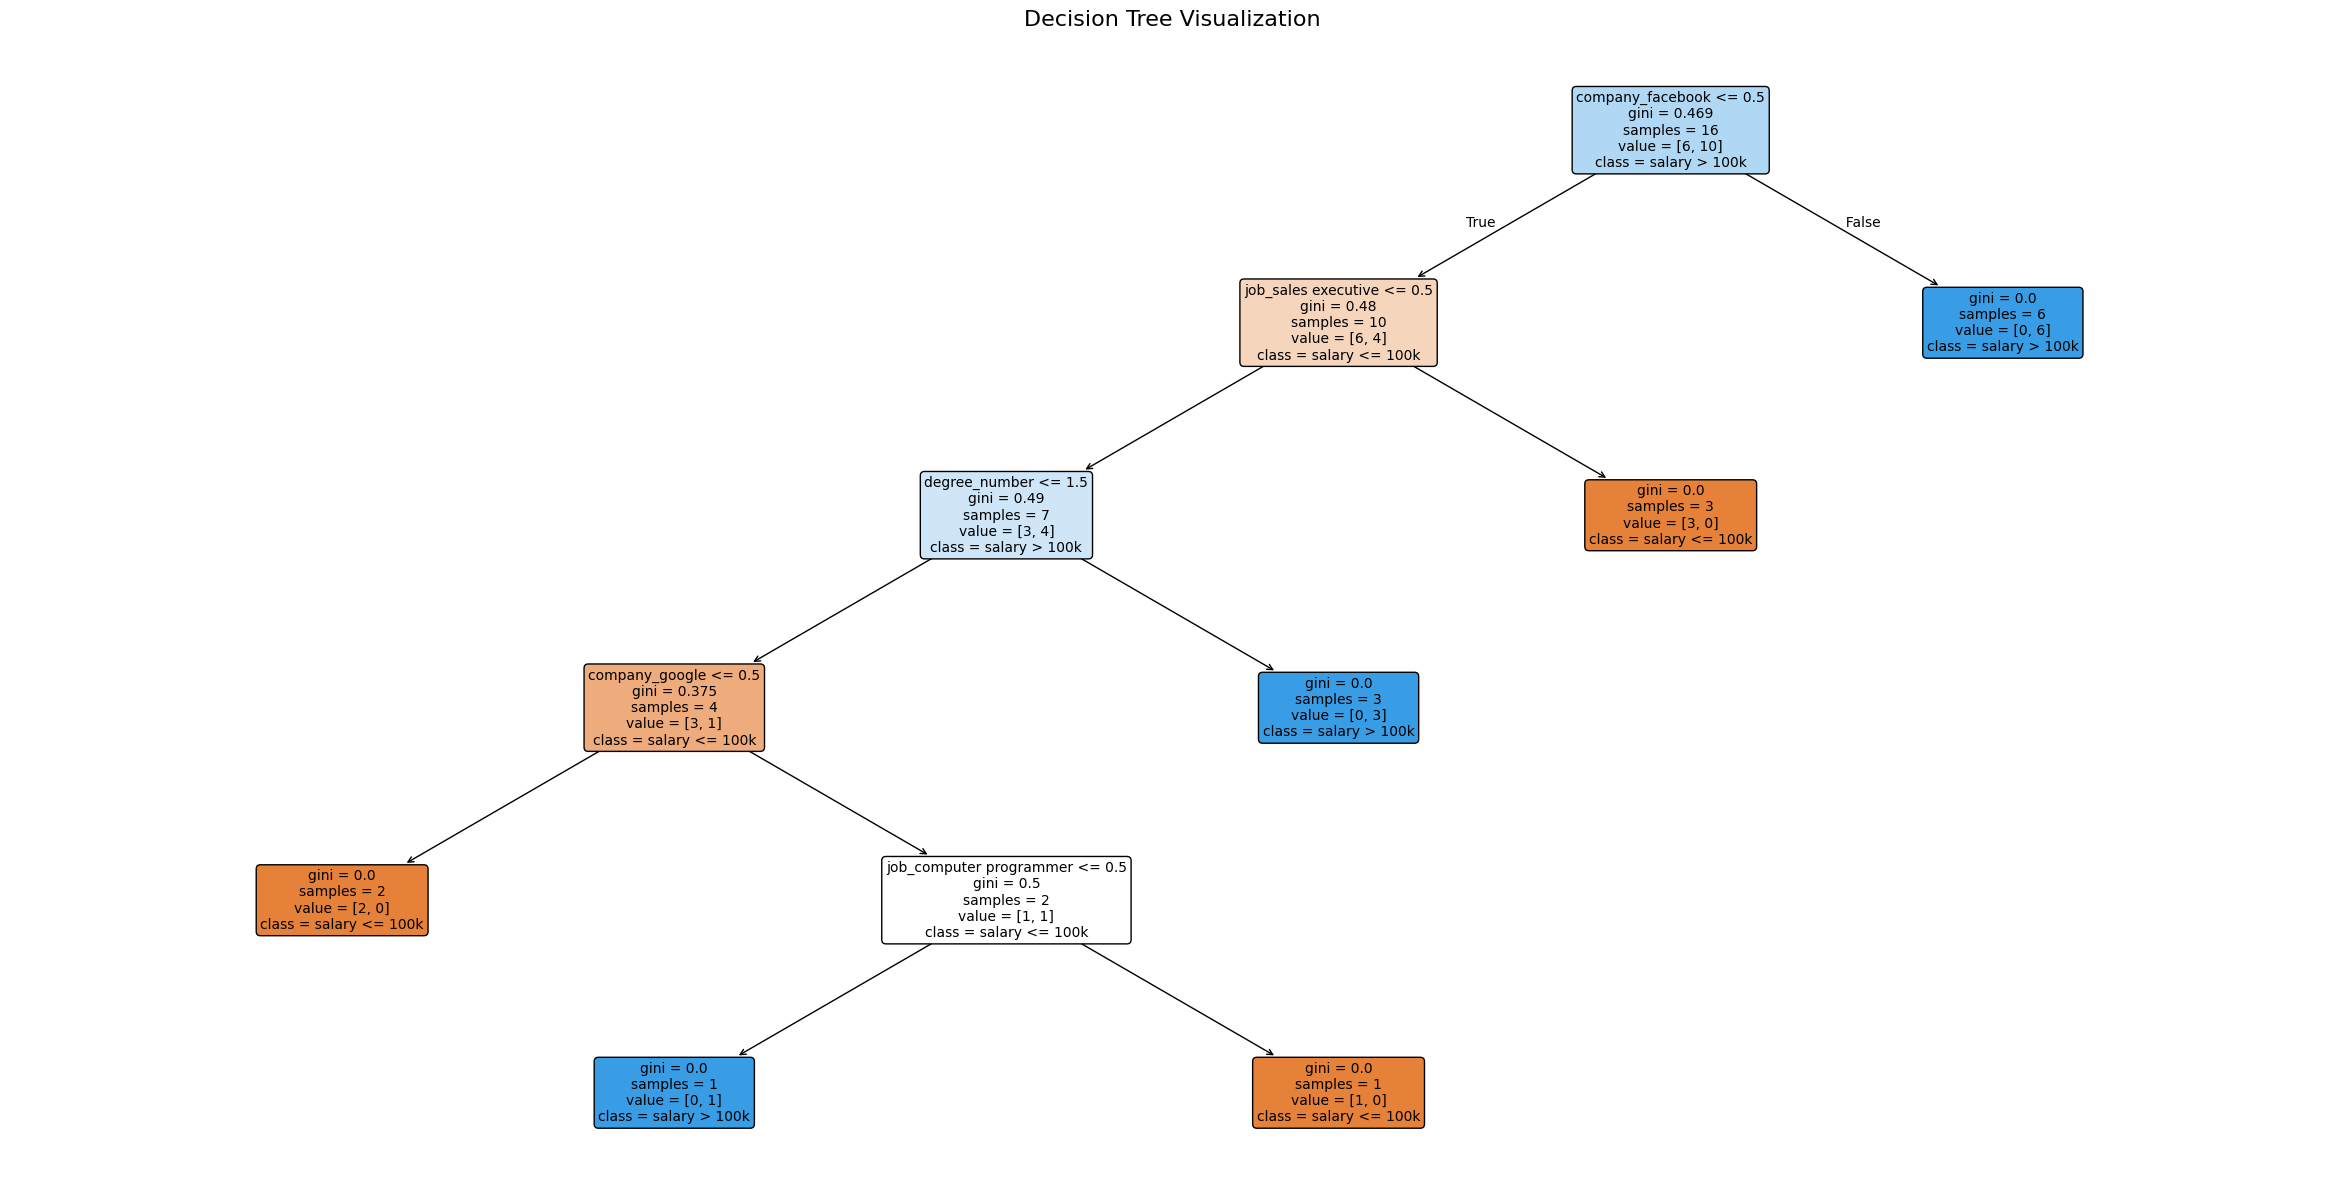

In [113]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(30,15)) # Increased figure size for overall larger plot
plot_tree(model, feature_names=X.columns, class_names=['salary <= 100k', 'salary > 100k'], filled=True, rounded=True, fontsize=10)
plt.title('Decision Tree Visualization', fontsize=16)
plt.show()